<a href="https://colab.research.google.com/github/tajaddini/basketball-reference/blob/main/couera_project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import sqlite3
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
from google.colab import files
uploaded = files.upload()

Saving main.db to main.db


In [23]:
#connect db
conn = sqlite3.connect('/content/main.db')
c=conn.cursor()

#query
c.execute("""select
  p.id,
  a.award_type,
  p.name,
  p.age,
  p.height,
  p.weight,
  a.season,
  p.pos,
  a.points_per_game,
  a.assists_per_game,
  a.win_shares,
  s.salary,
  a.pct_threeP_field_goals
FROM players p
join awards a on
p.id=a.player_id
join salaries s on
s.player_id=a.player_id and s.season=a.season
WHERE p.pos LIKE '%Point Guard%' and a.season > 2018 ;
""")

result=c.fetchall()
print(result)

[('s/smartma01', 'DPOY', 'Marcus Smart', 31.863013698630137, 190, 99, '2021-22', 'Point Guard and Shooting Guard', 12.1, 5.9, 5.6, 13839285, 0.331), ('a/antetgi01', 'DPOY', 'Giannis Antetokounmpo', 31.10958904109589, 211, 110, '2019-20', 'Power Forward, Small Forward, Point Guard, and Shooting Guard', 29.5, 5.6, 11.1, 25842697, 0.304), ('a/antetgi01', 'MVP', 'Giannis Antetokounmpo', 31.10958904109589, 211, 110, '2018-19', 'Power Forward, Small Forward, Point Guard, and Shooting Guard', 27.7, 5.9, 14.4, 24157304, 0.256), ('a/antetgi01', 'MVP', 'Giannis Antetokounmpo', 31.10958904109589, 211, 110, '2019-20', 'Power Forward, Small Forward, Point Guard, and Shooting Guard', 29.5, 5.6, 11.1, 25842697, 0.304), ('g/gilgesh01', 'MVP', 'Shai Gilgeous-Alexander', 27.50958904109589, 198, 88, '2024-25', 'Point Guard and Shooting Guard', 32.7, 6.4, 16.7, 35859950, 0.375)]


In [24]:
column_names = [
    'id', 'award_type', 'name', 'age', 'height', 'weight',
    'season', 'pos', 'points_per_game', 'assists_per_game',
    'win_shares', 'salary', 'pct_threeP_field_goals'
]

df = pd.DataFrame(result, columns=column_names)

In [25]:
cols_to_numeric = [
    'age','points_per_game', 'assists_per_game',
    'win_shares', 'salary', 'pct_threeP_field_goals' , 'height' , 'weight'
]


for col in cols_to_numeric:

  df[col] = pd.to_numeric(df[col])

df['final_score'] = df['assists_per_game'] *0.65 + df['win_shares'] *0.1 +  df['age'] *0.1 + df['height'] *0.1 + df['salary']*0.0001


print(df[['id','name','award_type','age', 'height','weight',  'season', 'pos', 'salary', 'win_shares', 'assists_per_game','points_per_game',"final_score"]].head())

            id                     name award_type        age  height  weight  \
0  s/smartma01             Marcus Smart       DPOY  31.863014     190      99   
1  a/antetgi01    Giannis Antetokounmpo       DPOY  31.109589     211     110   
2  a/antetgi01    Giannis Antetokounmpo        MVP  31.109589     211     110   
3  a/antetgi01    Giannis Antetokounmpo        MVP  31.109589     211     110   
4  g/gilgesh01  Shai Gilgeous-Alexander        MVP  27.509589     198      88   

    season                                                pos    salary  \
0  2021-22                     Point Guard and Shooting Guard  13839285   
1  2019-20  Power Forward, Small Forward, Point Guard, and...  25842697   
2  2018-19  Power Forward, Small Forward, Point Guard, and...  24157304   
3  2019-20  Power Forward, Small Forward, Point Guard, and...  25842697   
4  2024-25                     Point Guard and Shooting Guard  35859950   

   win_shares  assists_per_game  points_per_game  final_score 

                       age    height  points_per_game  assists_per_game  \
age               1.000000  0.173041        -0.600578         -0.822568   
height            0.173041  1.000000         0.678544         -0.563894   
points_per_game  -0.600578  0.678544         1.000000          0.120180   
assists_per_game -0.822568 -0.563894         0.120180          1.000000   
win_shares       -0.773743  0.403665         0.869263          0.523270   
salary           -0.874582  0.318295         0.912015          0.482369   
final_score      -0.874066  0.319378         0.912476          0.481642   

                  win_shares    salary  final_score  
age                -0.773743 -0.874582    -0.874066  
height              0.403665  0.318295     0.319378  
points_per_game     0.869263  0.912015     0.912476  
assists_per_game    0.523270  0.482369     0.481642  
win_shares          1.000000  0.908648     0.908911  
salary              0.908648  1.000000     0.999999  
final_score         0

Text(0.5, 1.0, 'correlatin players')

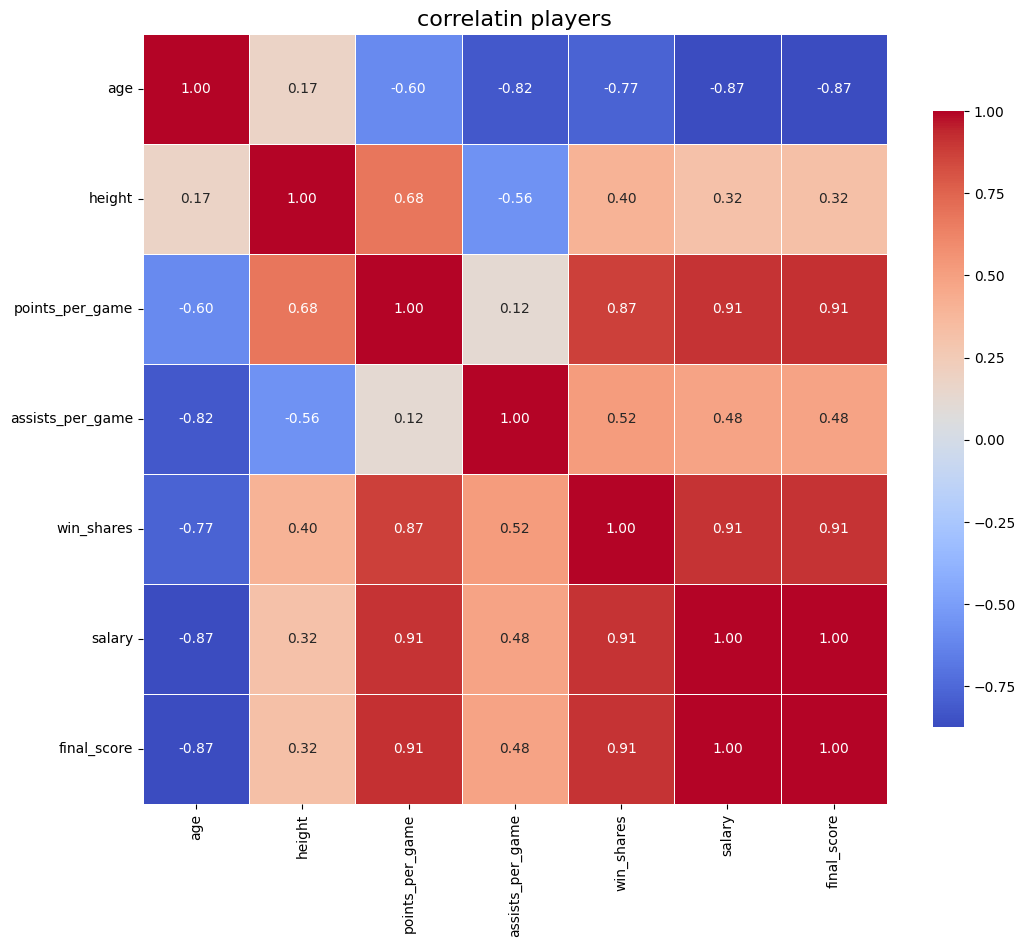

In [26]:
correlation_cols = [
    'age',
    'height',
    'points_per_game',
    'assists_per_game',
    'win_shares',
    'salary',
    'final_score'
]

available_cols = [col for col in correlation_cols if col in df.columns]
correlation_matrix = df[available_cols].corr()
print(correlation_matrix)

plt.figure(figsize=(12, 10))
sns.heatmap(
        correlation_matrix,
        annot=True,
        cmap='coolwarm',
        fmt=".2f",
        linewidths=.5,
        cbar_kws={'shrink': .8}
    )
plt.title('correlatin players', fontsize=16)

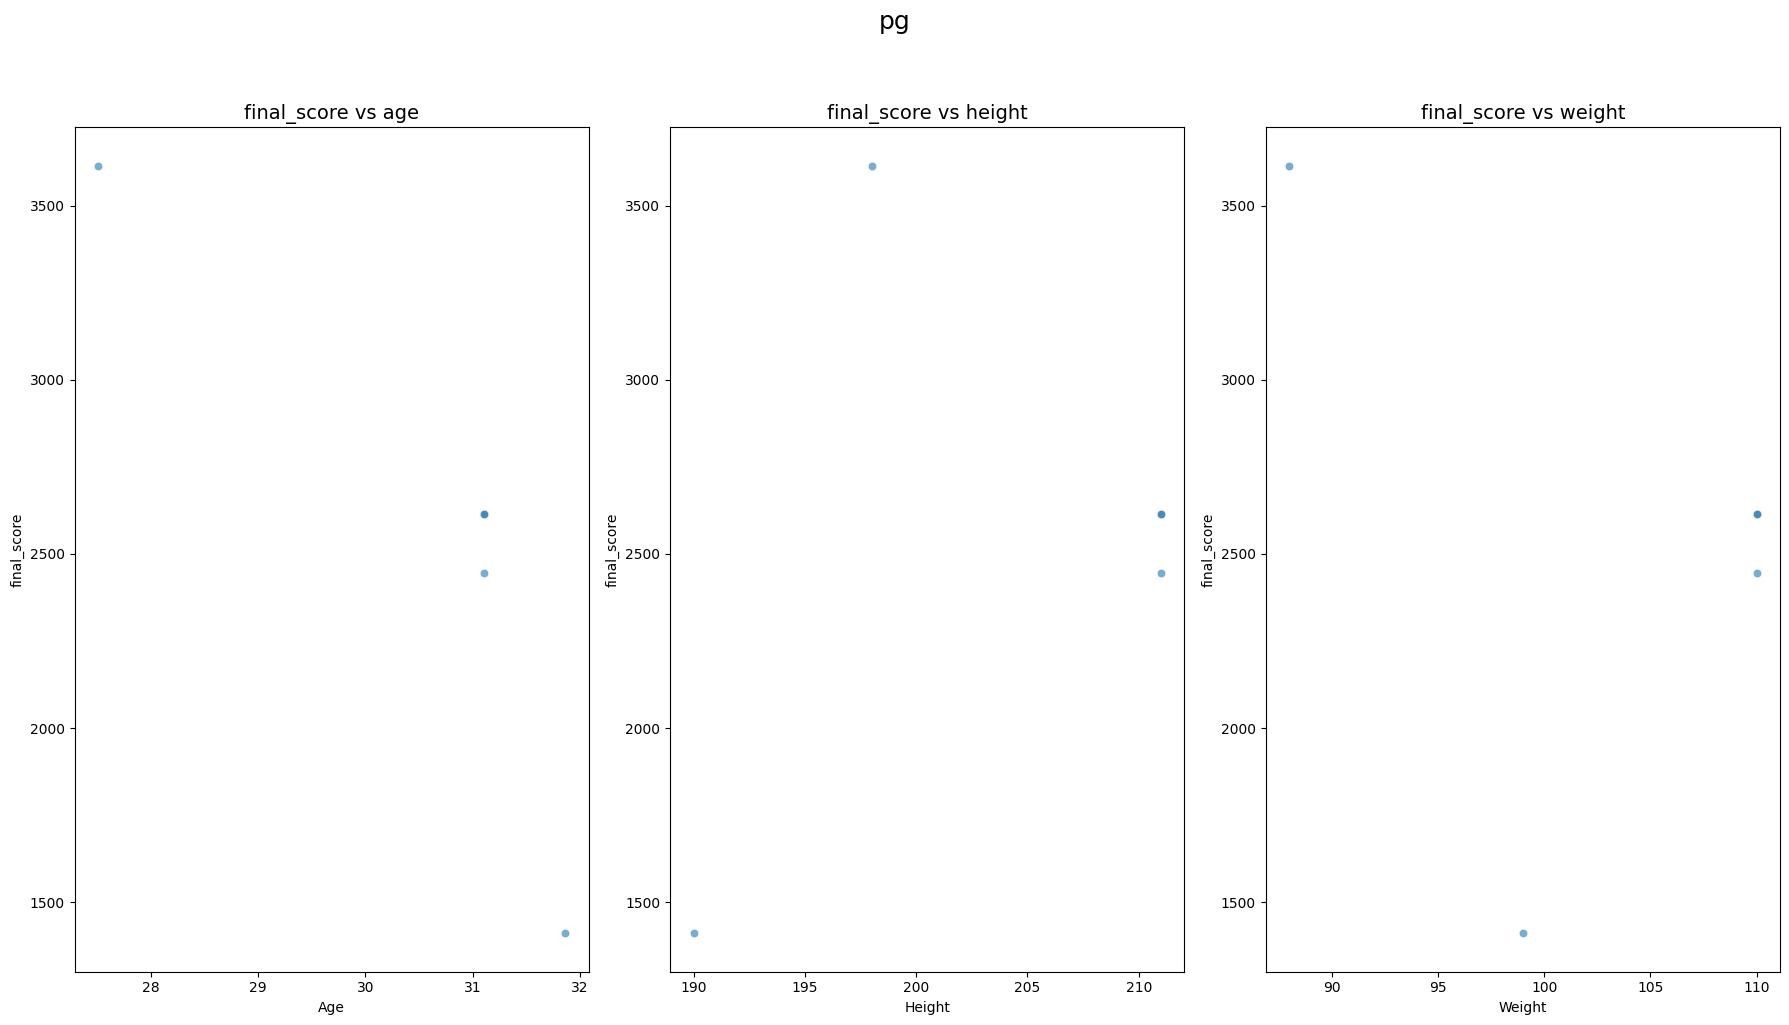

In [27]:
efficiency_metrics = [
    'final_score',
]
physical_features = ['age', 'height', 'weight']

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 10))
axes = axes.flatten()

for i, metric in enumerate(efficiency_metrics):
    for j, feature in enumerate(physical_features):
        ax_index = i * len(physical_features) + j
        sns.scatterplot(
            x=feature,
            y=metric,
            data=df,
            ax=axes[ax_index],
            alpha=0.6
        )
        axes[ax_index].set_title(f'{metric} vs {feature}', fontsize=14)
        axes[ax_index].set_xlabel(feature.capitalize())
        axes[ax_index].set_ylabel(metric)
plt.suptitle('pg', fontsize=18, y=1.02)
plt.tight_layout(rect=[0, 0, 1, 0.98])

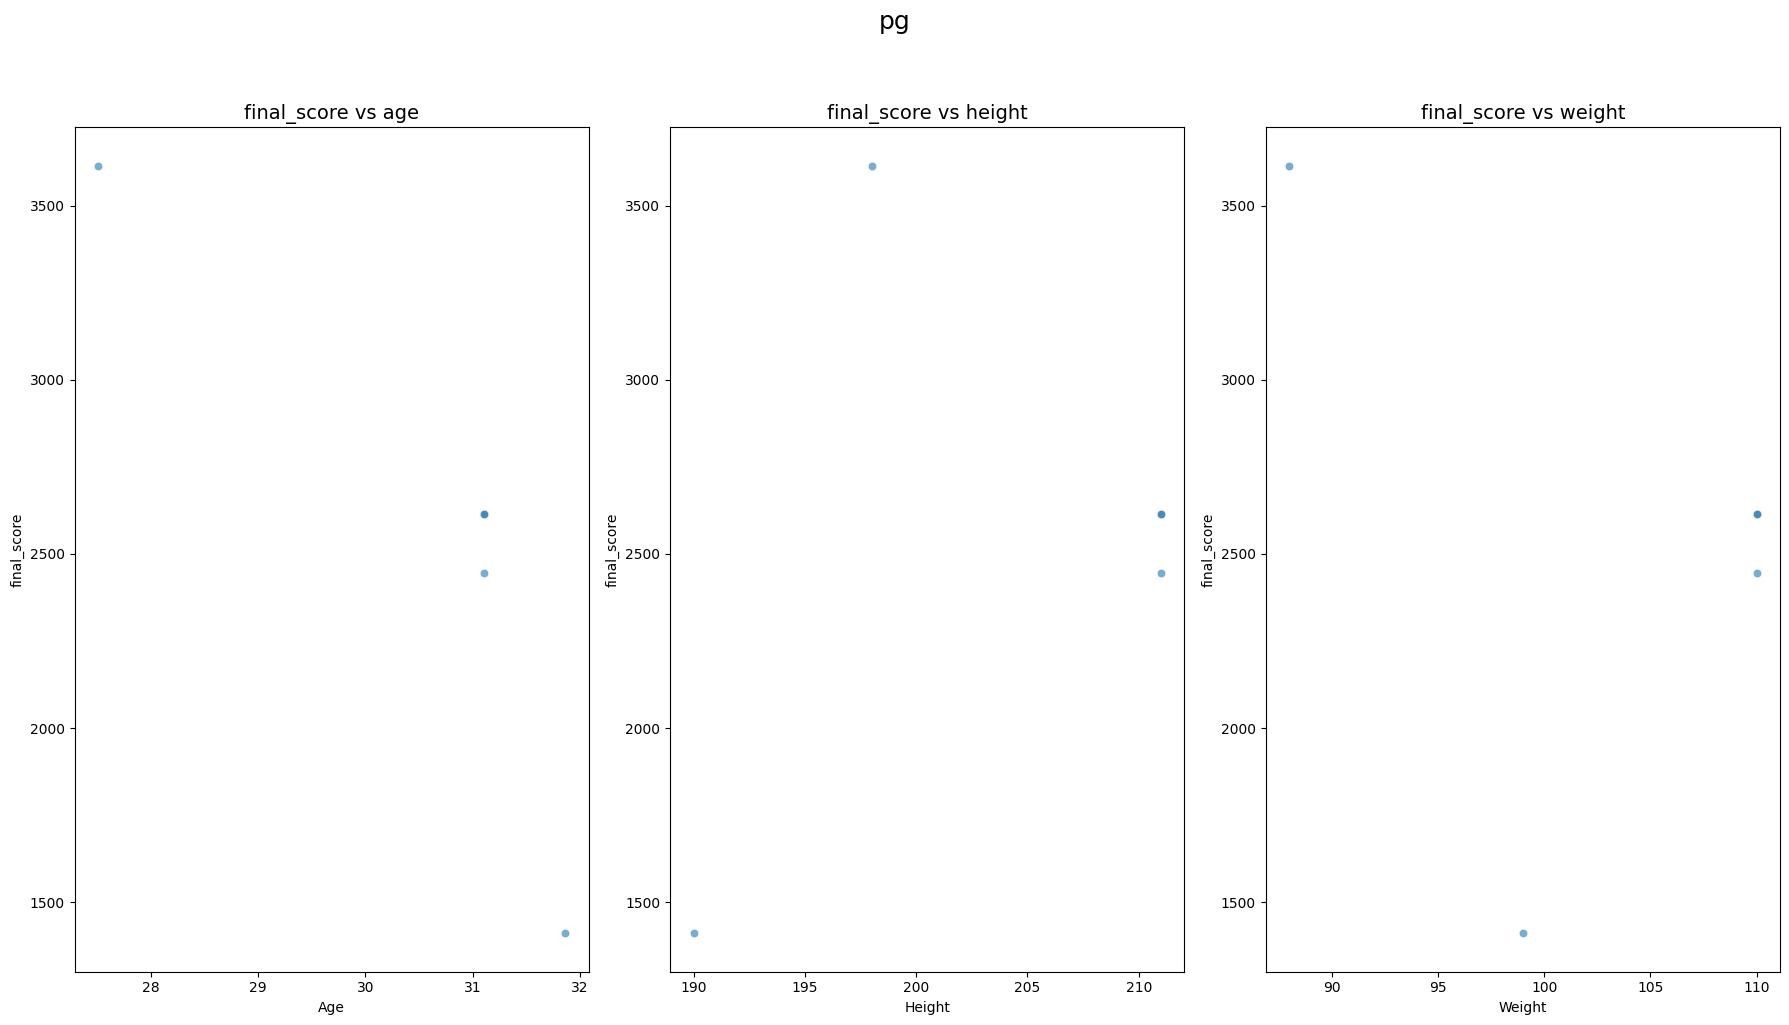

In [28]:
efficiency_metrics = [
    'final_score',
]
physical_features = ['age', 'height', 'weight']

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 10))
axes = axes.flatten()

for i, metric in enumerate(efficiency_metrics):
    for j, feature in enumerate(physical_features):
        ax_index = i * len(physical_features) + j
        sns.scatterplot(
            x=feature,
            y=metric,
            data=df,
            ax=axes[ax_index],
            alpha=0.6
        )
        axes[ax_index].set_title(f'{metric} vs {feature}', fontsize=14)
        axes[ax_index].set_xlabel(feature.capitalize())
        axes[ax_index].set_ylabel(metric)
plt.suptitle('pg', fontsize=18, y=1.02)
plt.tight_layout(rect=[0, 0, 1, 0.98])

In [29]:
df

,id,award_type,name,age,height,weight,season,pos,points_per_game,assists_per_game,win_shares,salary,pct_threeP_field_goals,final_score
0,s/smartma01,DPOY,Marcus Smart,31.863014,190,99,2021-22,Point Guard and Shooting Guard,12.1,5.9,5.6,13839285,0.331,1410.509801
1,a/antetgi01,DPOY,Giannis Antetokounmpo,31.109589,211,110,2019-20,"Power Forward, Small Forward, Point Guard, and...",29.5,5.6,11.1,25842697,0.304,2613.230659
2,a/antetgi01,MVP,Giannis Antetokounmpo,31.109589,211,110,2018-19,"Power Forward, Small Forward, Point Guard, and...",27.7,5.9,14.4,24157304,0.256,2445.216359
3,a/antetgi01,MVP,Giannis Antetokounmpo,31.109589,211,110,2019-20,"Power Forward, Small Forward, Point Guard, and...",29.5,5.6,11.1,25842697,0.304,2613.230659
4,g/gilgesh01,MVP,Shai Gilgeous-Alexander,27.509589,198,88,2024-25,Point Guard and Shooting Guard,32.7,6.4,16.7,35859950,0.375,3614.375959


In [ ]:
#First 3 players for pg

1.Shai Gilgeous-Alexander
2.James Harden
3.Giannis Antetokounmpo